In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import graphviz
import seaborn as sns; sns.set()
from sklearn.linear_model import SGDClassifier 
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, ParameterGrid
from sklearn.metrics import *
import time


%matplotlib inline

In [2]:
cd code

/Users/tianchushu/Desktop/syntaxerror-mlpp2018/code


In [3]:
import final_connection
import final_default_grids
import final_explore_and_viz
import final_load_dfs
import final_plot
import final_preprocessing
import final_temporal
import indpv_lists as final_options
import jocojims
import final_classifier_final

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [4]:
# LOADS CSV WITH MERGED DATA WITH ACS
df = final_load_dfs.load_from_file('FINAL.csv')

#Save a clean copy for later viz purpose
viz_df = df.copy()

# FINDING BASE PROBABILITY OF RE-ENTRY
print ('Prob of re-entry within one year')
print (df['within_one'].sum()/df.shape[0])
print ('Prob of re-entry within two year')
print (df['within_two'].sum()/df.shape[0])
print (' ')


LoadedFINAL.csv
Prob of re-entry within one year
0.21966193263209594
Prob of re-entry within two year
0.2725821634674416
 


In [5]:
# DROPPING COLUMNS NOT USED IN ANALYSIS
print('DROPPING THESE COLUMNS: ', jocojims.DROP_COLS)
df = df.drop(jocojims.DROP_COLS, axis = 1)
print (' ')

# CREATING DUMMIES
print ('The following columns have been broken into dummies:' , jocojims.DUMMIES)
for dummy in jocojims.DUMMIES:
    df = final_preprocessing.dummy_variable(dummy, df)
print (' ')

# DISCRETIZATION
for category in jocojims.CATS:
    df = final_preprocessing.bin_gen(df, category, '_bin', 'suffix' )
print ('Discretizing the following variables: ', jocojims.CATS)
print (' ')

DROPPING THESE COLUMNS:  ['re_entry', 'mni_no', 'dedupe_id', 'dob', 'state', 'city', 'zip', 'release_date', 'case_no', 'booking_no', 'after_released']
 
The following columns have been broken into dummies: ['sex', 'race', 'mar_stat', 'case_type', 'arresting_agency', 'arresting_agency_type', 'bail_type', 'pri_dx_value', 'refferal_source']
 
Discretizing the following variables:  ['age', 'per_capita_income', 'poverty_stat', 'household_income', 'mortgage_stat', 'school_enrollment_16-19', 'own_children_under18', 'SSI_income', 'grandparent_care', 'military_service', 'education_25', 'property_value_occupied', 'retirement_income', 'rent_over_income', 'bail_amt']
 


In [6]:
list(df.columns)

['booking_date',
 'bailed_out',
 'mh_treatment',
 'within_one',
 'within_two',
 'sexFEMALE',
 'sexMALE',
 'sexmissing',
 'raceAMERICAN INDIAN OR ALASKA NATIVE',
 'raceASIAN',
 'raceBLACK OR AFRICAN AMERICAN',
 'raceWHITE',
 'mar_statA',
 'mar_statD',
 'mar_statM',
 'mar_statN',
 'mar_statS',
 'mar_statU',
 'mar_statW',
 'mar_statY',
 'mar_statmissing',
 'case_typeCR',
 'case_typeDV',
 'case_typeJV',
 'arresting_agencyFAIRWAY P.D.',
 'arresting_agencyGARDNER P.D.',
 'arresting_agencyJOHNSON COUNTY PARK PATROL',
 "arresting_agencyJOHNSON COUNTY SHERIFF'S DEPARTMENT",
 'arresting_agencyKANSAS HIGHWAY PATROL',
 'arresting_agencyLAKE QUIVIRA P.D.',
 'arresting_agencyLEAWOOD P.D.',
 'arresting_agencyLENEXA P.D.',
 'arresting_agencyMERRIAM P.D.',
 'arresting_agencyMISSION P.D.',
 'arresting_agencyOLATHE P.D.',
 'arresting_agencyOTHER AGENCY',
 'arresting_agencyOVERLAND PARK P.D.',
 'arresting_agencyPRAIRIE VILLAGE P.D.',
 'arresting_agencyROELAND PARK P.D.',
 'arresting_agencySHAWNEE MISSION 

In [7]:
# SETTING DATES FOR SEPARATING TRAIN & TESTING DATA
end =  df['booking_date'].max()[:10]
start =  df['booking_date'].min()[:10]
middle_date = '2015-07-01'

# SPLITTING DATASET INTO TRAINING AND TESTING
train, test = final_temporal.temporal_split(df, 'booking_date', start, middle_date, end)
trainv,testv = final_temporal.temporal_split(viz_df, 'booking_date', start, middle_date, end)


# SPLITTING DEPENDENT AND INDEPENDENT VARIABLES
# within_one == come back within one year
# within_two == come back within two year
y = ['within_one', 'within_two']
x_train, x_test, y_train, y_test = final_temporal.split_data(train, test, y)

a, viz_x, b, c = final_temporal.split_data(trainv,testv, y)

In [8]:
final_options.bail_info

['mar_statA',
 'mar_statD',
 'mar_statM',
 'mar_statN',
 'mar_statS',
 'mar_statU',
 'mar_statW',
 'mar_statY',
 'mar_statmissing',
 'age_bin1',
 'age_bin2',
 'age_bin3',
 'age_bin4',
 'own_children_under18_bin1',
 'own_children_under18_bin2',
 'own_children_under18_bin3',
 'own_children_under18_bin4',
 'grandparent_care_bin1',
 'grandparent_care_bin2',
 'grandparent_care_bin3',
 'grandparent_care_bin4',
 'military_service_bin1',
 'military_service_bin2',
 'military_service_bin3',
 'military_service_bin4',
 'raceAMERICAN INDIAN OR ALASKA NATIVE',
 'raceASIAN',
 'raceBLACK OR AFRICAN AMERICAN',
 'raceWHITE',
 'sexFEMALE',
 'sexMALE',
 'sexmissing',
 'per_capita_income_bin1',
 'per_capita_income_bin2',
 'per_capita_income_bin3',
 'per_capita_income_bin4',
 'poverty_stat_bin1',
 'poverty_stat_bin2',
 'poverty_stat_bin3',
 'poverty_stat_bin4',
 'household_income_bin1',
 'household_income_bin2',
 'household_income_bin3',
 'household_income_bin4',
 'mortgage_stat_bin1',
 'mortgage_stat_bin2'

In [9]:
#Running on bail var
x_train = x_train[final_options.bail_info]
x_test = x_test[final_options.bail_info]

In [10]:
results = final_classifier_final.clf_loop(["RF", 'Boost', 'Bag', 'Logit', 'Tree', 'ET', 'NB'], x_train, x_test, y_train['within_one'], y_test['within_one'])

In [11]:
best = final_classifier_final.best_grid(results)

,model_type,parameters,auc-roc,precision,time,"precision,recall,f1 at_5","precision,recall,f1 at_10","precision,recall,f1 at_20"
33,Bag,"{'max_features': 10, 'max_samples': 5, 'n_esti...",0.5944,0.2418,0.0394,"(0.6099, 0.1525, 0.244)","(0.4505, 0.2253, 0.3004)","(0.3516, 0.3516, 0.3516)"
22,Boost,"{'algorithm': 'SAMME.R', 'n_estimators': 100}",0.6888,0.3597,2.1002,"(0.4615, 0.1154, 0.1846)","(0.4643, 0.2321, 0.3095)","(0.3997, 0.3997, 0.3997)"
113,ET,"{'criterion': 'entropy', 'max_depth': 50, 'max...",0.7029,0.3644,1.4278,"(0.4396, 0.1099, 0.1758)","(0.4286, 0.2143, 0.2857)","(0.3887, 0.3887, 0.3887)"
45,Logit,"{'C': 0.1, 'penalty': 'l2'}",0.6874,0.3657,0.1555,"(0.4505, 0.1126, 0.1802)","(0.478, 0.239, 0.3187)","(0.397, 0.397, 0.397)"
114,NB,{},0.6441,0.2961,0.1005,"(0.4286, 0.1071, 0.1714)","(0.3379, 0.169, 0.2253)","(0.3077, 0.3077, 0.3077)"
15,RF,"{'max_depth': 50, 'max_features': 'log2', 'min...",0.7126,0.3737,1.6216,"(0.4835, 0.1209, 0.1934)","(0.4286, 0.2143, 0.2857)","(0.3901, 0.3901, 0.3901)"
51,Tree,"{'criterion': 'gini', 'max_depth': 5, 'max_fea...",0.6730,0.3121,0.0189,"(0.6593, 0.1648, 0.2637)","(0.4066, 0.2033, 0.2711)","(0.3846, 0.3846, 0.3846)"


In [12]:
best

{'Bag': {'max_features': [10], 'max_samples': [5], 'n_estimators': [10]},
 'Boost': {'algorithm': ['SAMME.R'], 'n_estimators': [100]},
 'ET': {'criterion': ['entropy'],
  'max_depth': [50],
  'max_features': ['log2'],
  'min_samples_split': [10],
  'n_estimators': [100],
  'n_jobs': [-1]},
 'Logit': {'C': [0.1], 'penalty': ['l2']},
 'NB': {},
 'RF': {'max_depth': [50],
  'max_features': ['log2'],
  'min_samples_split': [10],
  'n_estimators': [100]},
 'Tree': {'criterion': ['gini'],
  'max_depth': [5],
  'max_features': ['sqrt'],
  'min_samples_split': [5]}}

In [13]:
df_sorting = final_classifier_final.finding_risk_scores(x_train, x_test, y_train['within_one'], y_test['within_one'], best, viz_x)

Bag
Boost
ET
Logit
NB
RF
Tree


In [14]:
#Use the best performed Random Forest model to see the top 10% at risk people's data

In [15]:
RF_df = df_sorting.sort_values(by=['RF'], ascending=False)

In [16]:
RF_df.columns

Index(['SSI_income', 'after_released', 'age', 'arresting_agency',
       'arresting_agency_type', 'bail_amt', 'bail_type', 'bailed_out',
       'booking_no', 'case_no', 'case_type', 'city', 'dedupe_id', 'dob',
       'education_25', 'grandparent_care', 'household_income', 'mar_stat',
       'mh_treatment', 'military_service', 'mni_no', 'mortgage_stat',
       'own_children_under18', 'per_capita_income', 'poverty_stat',
       'pri_dx_value', 'property_value_occupied', 'race', 're_entry',
       'refferal_source', 'release_date', 'rent_over_income',
       'retirement_income', 'school_enrollment_16-19', 'sex', 'state', 'zip',
       'Bag', 'Boost', 'ET', 'Logit', 'NB', 'RF', 'Tree'],
      dtype='object')

In [17]:
features_to_see = ['bail_amt', 'bail_type', 'bailed_out','case_type', 'city', 
       'education_25', 'grandparent_care', 'household_income', 'mar_stat',
       'mh_treatment', 'military_service', 'mortgage_stat',
       'own_children_under18', 'per_capita_income', 'poverty_stat',
       'property_value_occupied', 'race', 're_entry', 'rent_over_income']

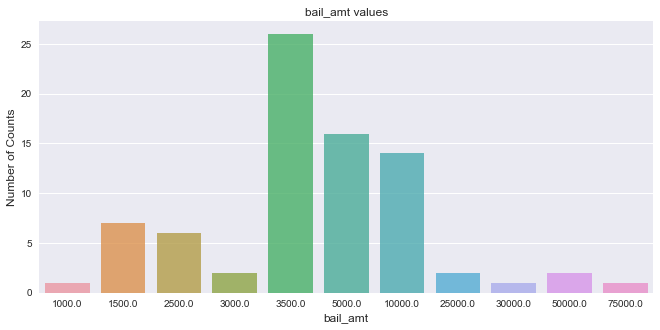

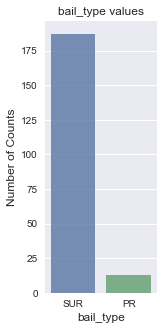

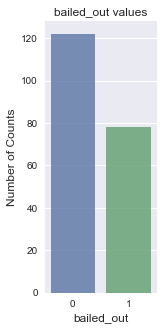

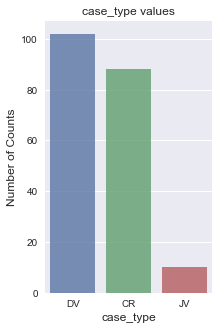

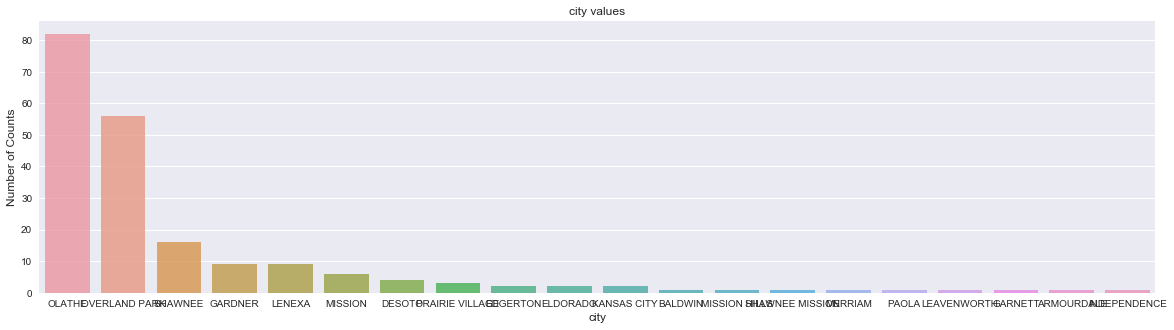

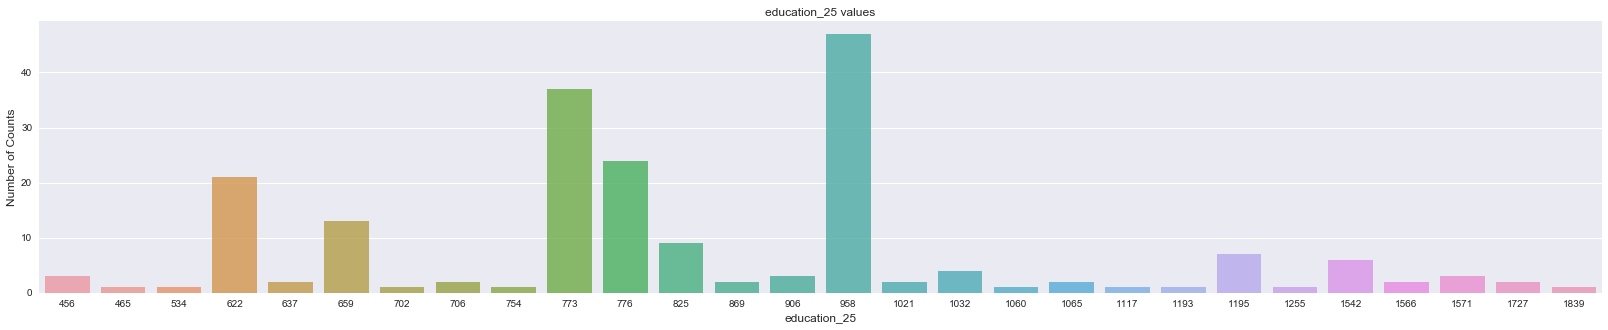

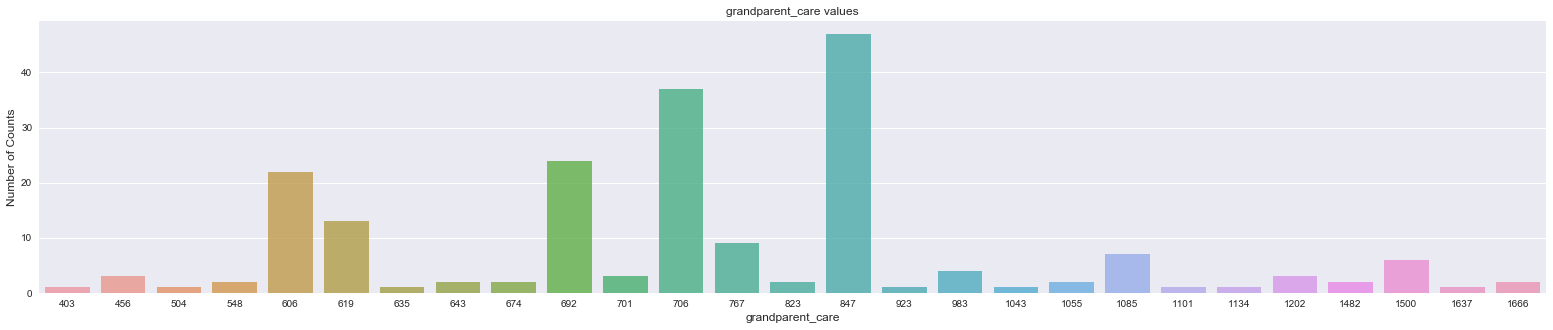

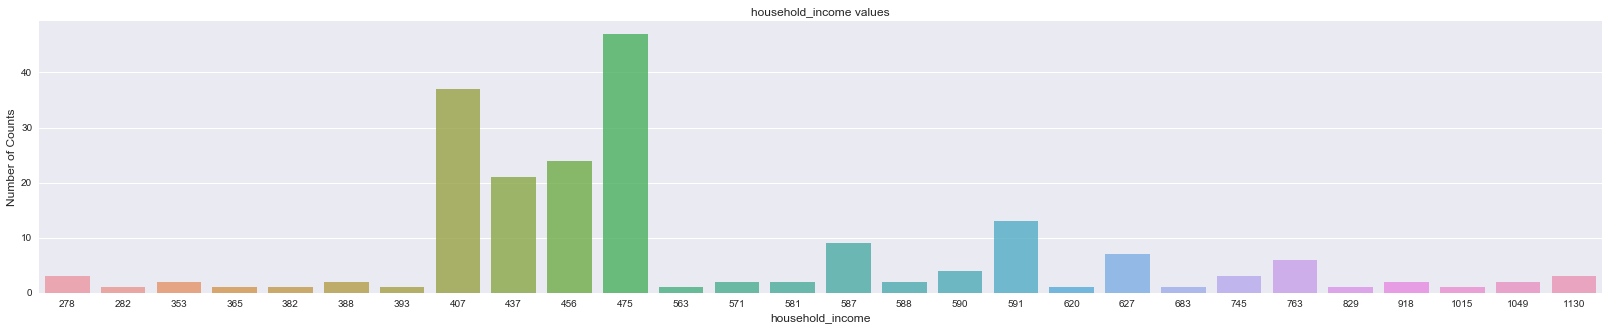

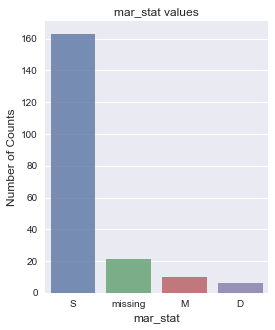

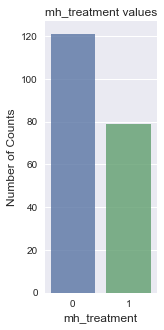

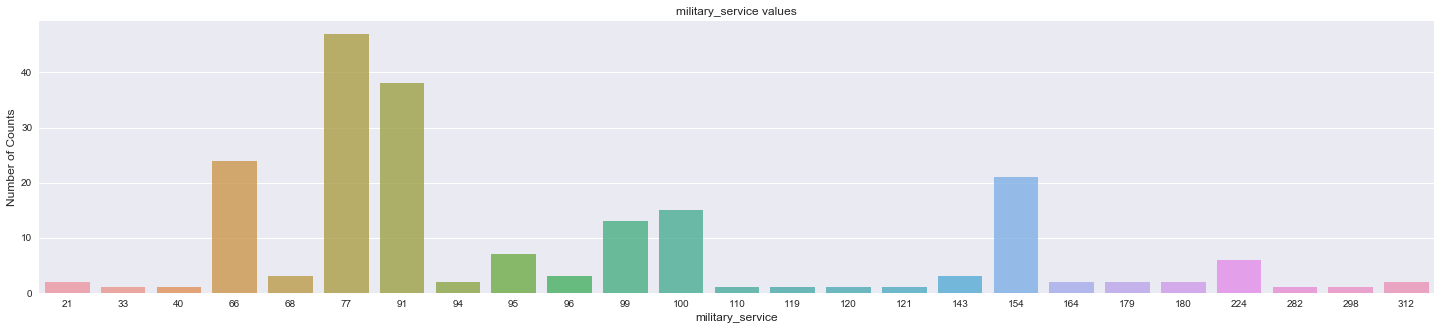

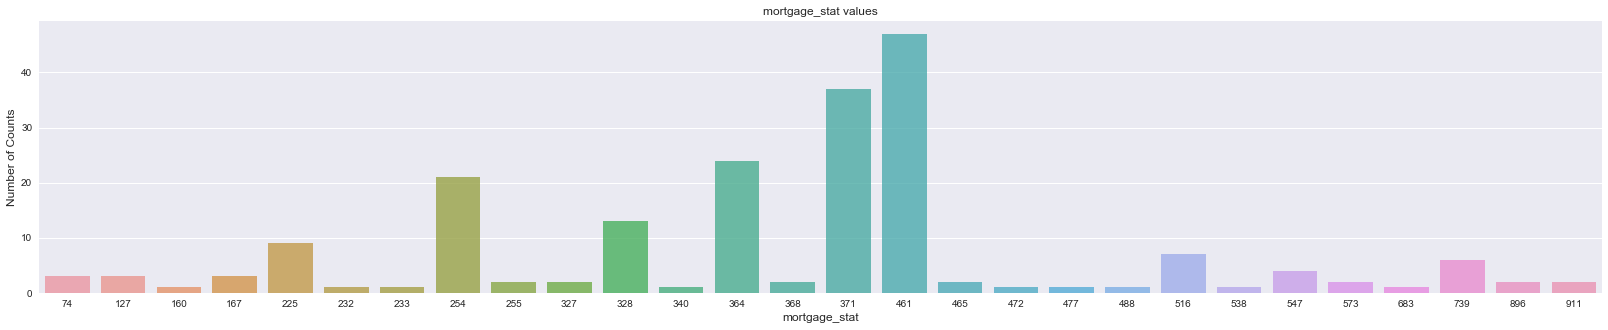

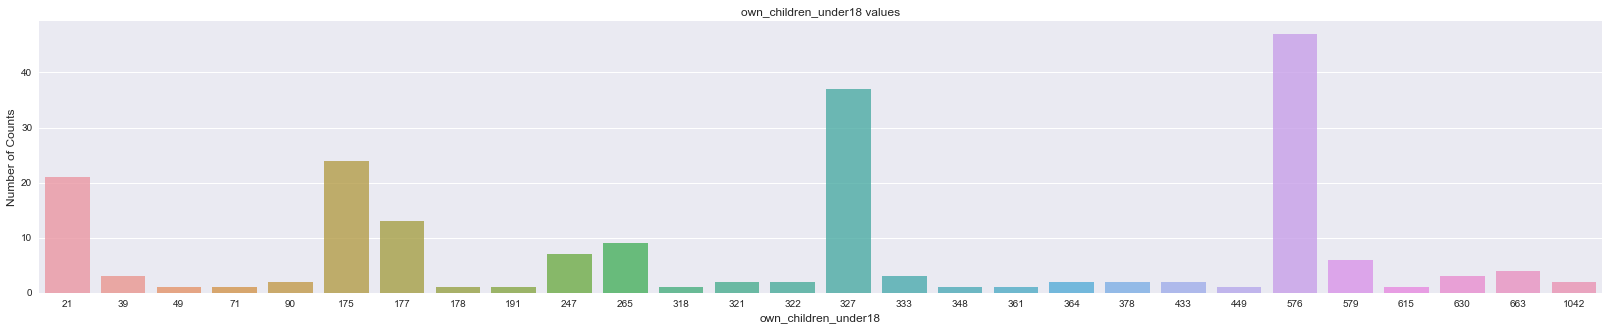

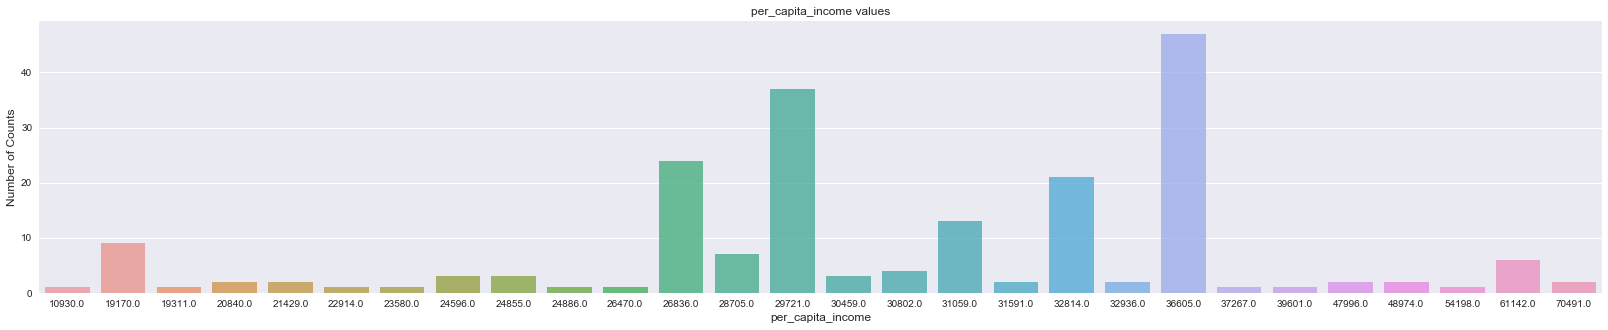

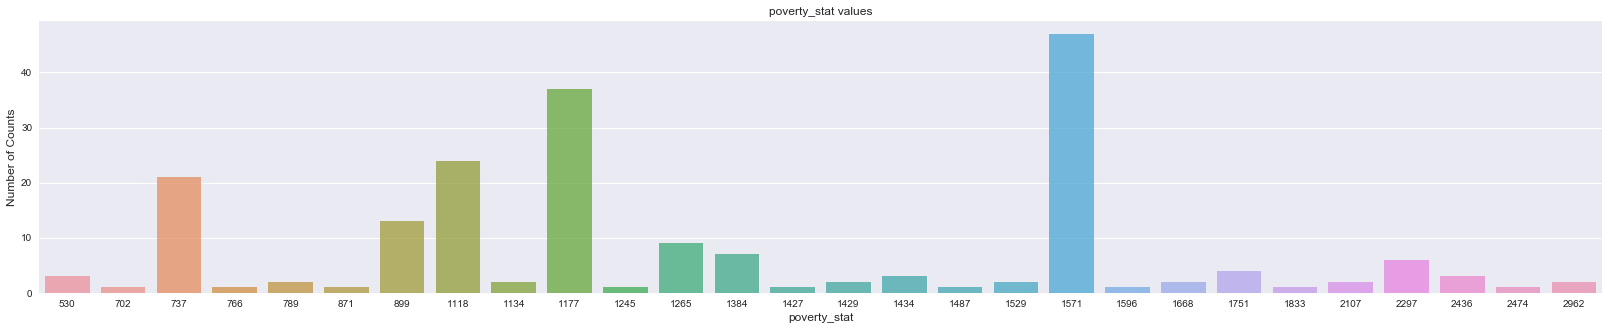

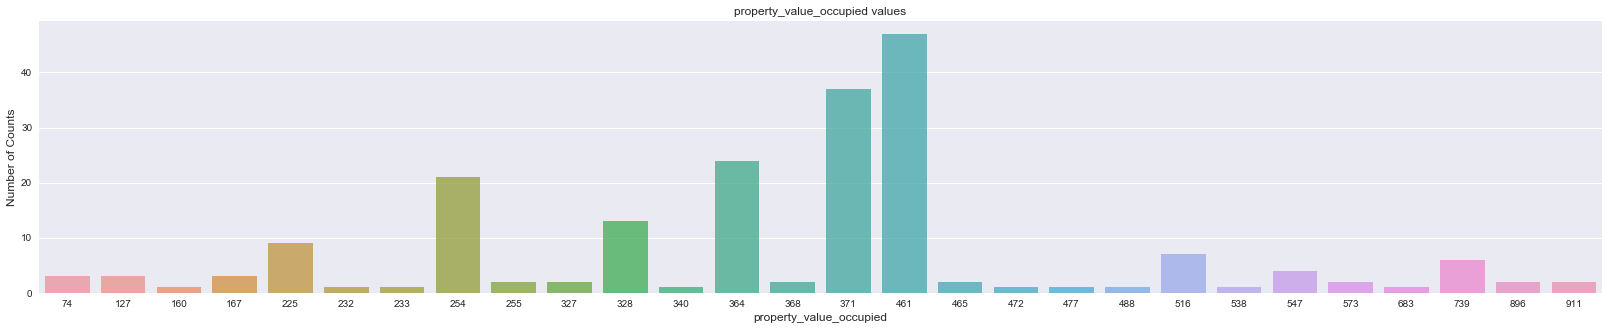

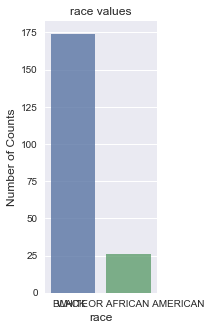

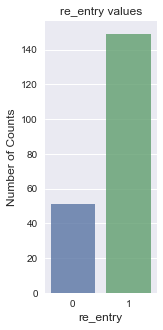

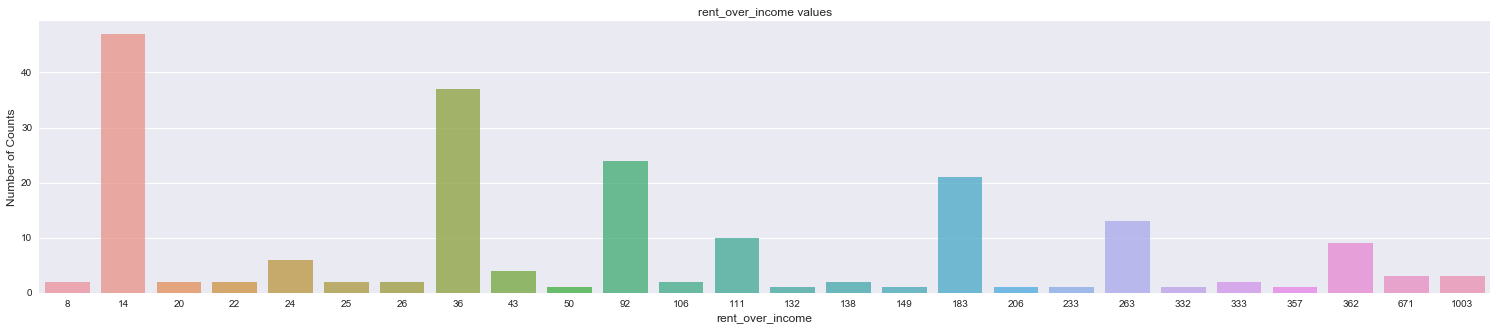

In [18]:
final_plot.plot_df(RF_df[:200], features_to_see, save=False)

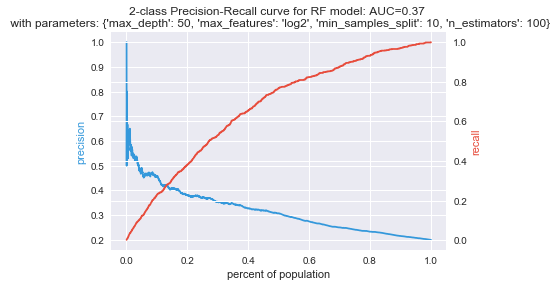

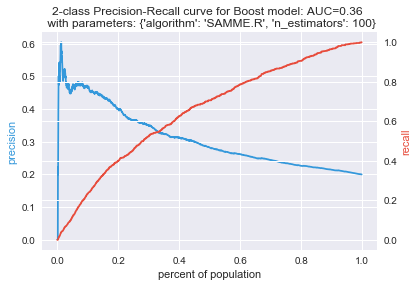

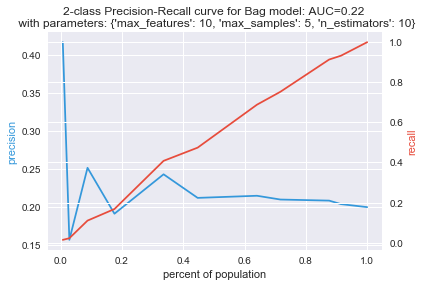

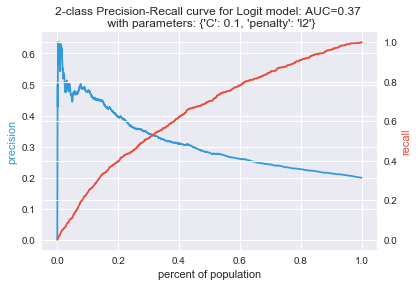

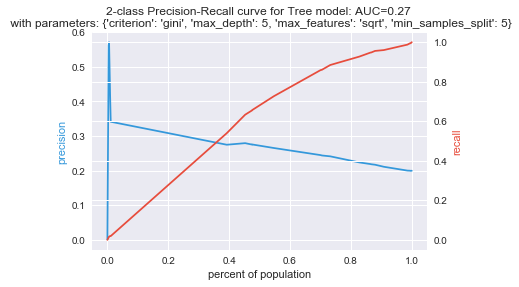

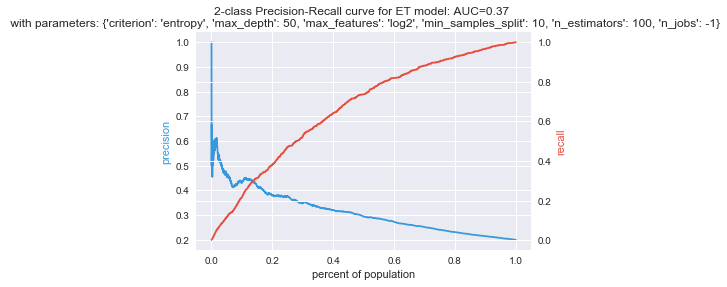

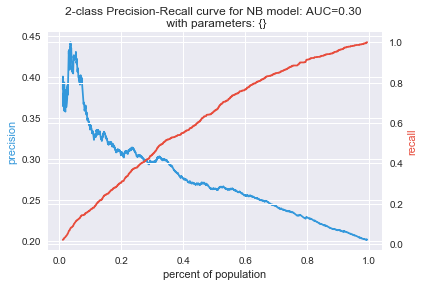

In [19]:
final_plot.plot_best(["RF", "Boost", "Bag", "Logit", "Tree",  "ET", "NB"],  x_train, x_test, y_train['within_one'], y_test['within_one'], best)

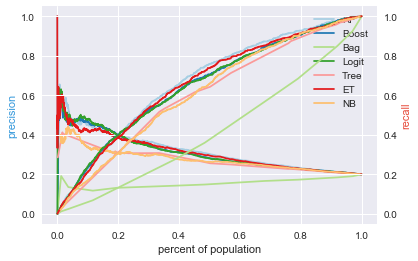

In [20]:
final_plot.plot_mult(['RF', 'Boost','Bag', 'Logit', 'Tree', 'ET', 'NB'], x_train, x_test, y_train['within_one'], y_test['within_one'], best)

Feature ranking for within_one
1. bailed_out (0.045103)
2. bail_typeSUR (0.038557)
3. case_typeCR (0.034912)
4. bail_amt_bin1 (0.033745)
5. age_bin1 (0.029883)
6. bail_typePR (0.026056)
7. case_typeDV (0.024280)
8. sexMALE (0.024272)
9. sexFEMALE (0.024127)
10. bail_amt_bin3 (0.023239)
11. age_bin2 (0.022671)
12. age_bin4 (0.022566)
13. bail_amt_bin2 (0.022554)
14. mar_statS (0.022084)
15. age_bin3 (0.020701)
16. bail_amt_bin4 (0.020182)
17. mar_statM (0.019771)
18. case_typeJV (0.018786)
19. raceWHITE (0.018720)
20. arresting_agencyOLATHE P.D. (0.018578)


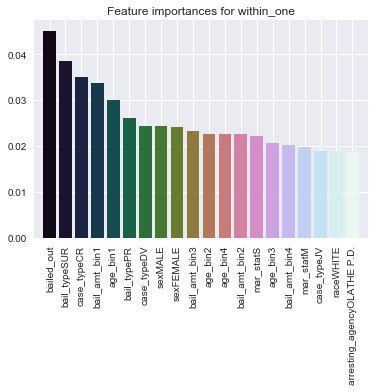

In [21]:
final_plot.feature_importance(x_train, y_train['within_one'], best, "ET",20)

In [22]:
########Running everything on second y within two year of re-entry

In [23]:
results2 = final_classifier_final.clf_loop(["RF", 'Boost', 'Bag', 'Logit', 'Tree', 'ET', 'NB'], x_train, x_test, y_train['within_two'], y_test['within_two'])

In [24]:
best2 = final_classifier_final.best_grid(results2)

,model_type,parameters,auc-roc,precision,time,"precision,recall,f1 at_5","precision,recall,f1 at_10","precision,recall,f1 at_20"
38,Bag,"{'max_features': 10, 'max_samples': 10, 'n_est...",0.5826,0.3158,0.0586,"(0.3681, 0.0714, 0.1195)","(0.3297, 0.1278, 0.1842)","(0.342, 0.2652, 0.2987)"
22,Boost,"{'algorithm': 'SAMME.R', 'n_estimators': 100}",0.6864,0.4343,1.8899,"(0.5659, 0.1097, 0.1838)","(0.5687, 0.2204, 0.3177)","(0.489, 0.3791, 0.4271)"
97,ET,"{'criterion': 'gini', 'max_depth': 50, 'max_fe...",0.7097,0.4588,1.2328,"(0.5769, 0.1118, 0.1873)","(0.5412, 0.2098, 0.3024)","(0.5014, 0.3887, 0.4379)"
43,Logit,"{'C': 0.01, 'penalty': 'l2'}",0.6883,0.4436,0.1061,"(0.5879, 0.114, 0.1909)","(0.5577, 0.2162, 0.3116)","(0.4986, 0.3866, 0.4355)"
114,NB,{},0.6450,0.3682,0.0816,"(0.489, 0.0948, 0.1588)","(0.4258, 0.1651, 0.2379)","(0.3874, 0.3003, 0.3383)"
15,RF,"{'max_depth': 50, 'max_features': 'log2', 'min...",0.7164,0.4639,1.8368,"(0.5495, 0.1065, 0.1784)","(0.5577, 0.2162, 0.3116)","(0.4973, 0.3855, 0.4343)"
70,Tree,"{'criterion': 'entropy', 'max_depth': 10, 'max...",0.6796,0.4104,0.0251,"(0.511, 0.099, 0.1659)","(0.5, 0.1938, 0.2794)","(0.4725, 0.3663, 0.4127)"


In [25]:
best2

{'Bag': {'max_features': [10], 'max_samples': [10], 'n_estimators': [20]},
 'Boost': {'algorithm': ['SAMME.R'], 'n_estimators': [100]},
 'ET': {'criterion': ['gini'],
  'max_depth': [50],
  'max_features': ['log2'],
  'min_samples_split': [10],
  'n_estimators': [100],
  'n_jobs': [-1]},
 'Logit': {'C': [0.01], 'penalty': ['l2']},
 'NB': {},
 'RF': {'max_depth': [50],
  'max_features': ['log2'],
  'min_samples_split': [10],
  'n_estimators': [100]},
 'Tree': {'criterion': ['entropy'],
  'max_depth': [10],
  'max_features': ['sqrt'],
  'min_samples_split': [2]}}

In [26]:
df_sorting2 = final_classifier_final.finding_risk_scores(x_train, x_test, y_train['within_two'], y_test['within_two'], best2, viz_x)

Bag
Boost
ET
Logit
NB
RF
Tree


In [27]:
RF_df2 = df_sorting2.sort_values(by=['RF'], ascending=False)

In [28]:
RF_df2[:200]

,SSI_income,after_released,age,arresting_agency,arresting_agency_type,bail_amt,bail_type,bailed_out,booking_no,case_no,...,sex,state,zip,Bag,Boost,ET,Logit,NB,RF,Tree
18822,388,218.0,33.0,PRAIRIE VILLAGE P.D.,CITY,NaN,SUR,0,16002633,15DV00945,...,MALE,KS,66208,0.300000,0.500235,1.000000,0.524778,0.913559,0.944465,0.637931
525,407,443.0,23.0,OLATHE P.D.,CITY,NaN,SUR,0,16004364,16CR01002,...,MALE,KS,66062,0.375000,0.500285,0.975556,0.508871,0.999996,0.916996,0.439227
823,407,213.0,17.0,JOHNSON COUNTY SHERIFF'S DEPARTMENT,COUNTY SHERIFF,NaN,SUR,0,15001117,15JV01201,...,MALE,KS,66062,0.391667,0.502980,0.997778,0.741366,1.000000,0.896689,0.753247
825,407,54.0,18.0,JOHNSON COUNTY SHERIFF'S DEPARTMENT,COUNTY SHERIFF,NaN,SUR,0,16000075,15JV01406,...,MALE,KS,66062,0.391667,0.502980,0.997778,0.741366,1.000000,0.896689,0.753247
533,407,-41.0,19.0,OLATHE P.D.,CITY,NaN,SUR,0,15011296,15DV01231,...,MALE,KS,66062,0.375000,0.501994,0.956599,0.668558,0.999998,0.867880,0.501730
532,407,365.0,19.0,OLATHE P.D.,CITY,NaN,SUR,0,15011296,15DV01231,...,MALE,KS,66062,0.375000,0.501994,0.956599,0.668558,0.999998,0.867880,0.501730
3048,475,85.0,20.0,OLATHE P.D.,CITY,NaN,SUR,0,16001575,16DV00160,...,MALE,KS,66061,0.400000,0.502161,0.904032,0.682547,1.000000,0.861818,1.000000
8294,456,0.0,23.0,OVERLAND PARK P.D.,CITY,NaN,SUR,0,16001080,16DV00114,...,MALE,KS,66212,0.366667,0.502046,0.919444,0.669827,0.999998,0.850972,0.738095
7425,456,255.0,19.0,OVERLAND PARK P.D.,CITY,NaN,SUR,0,15013138,15DV01442,...,MALE,KS,66212,0.366667,0.502046,0.919444,0.669827,0.999998,0.850972,0.738095
3361,475,0.0,23.0,OVERLAND PARK P.D.,CITY,NaN,SUR,0,15011589,15CR02427,...,FEMALE,KS,66061,0.466667,0.500777,0.910159,0.547548,1.000000,0.841786,0.684524


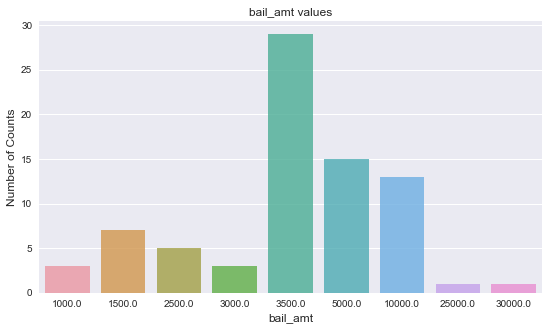

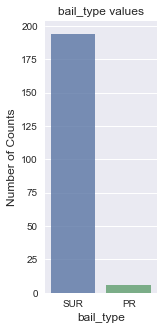

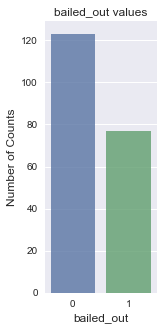

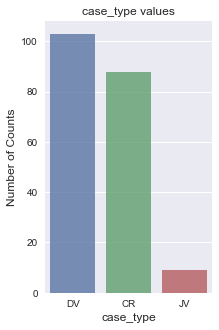

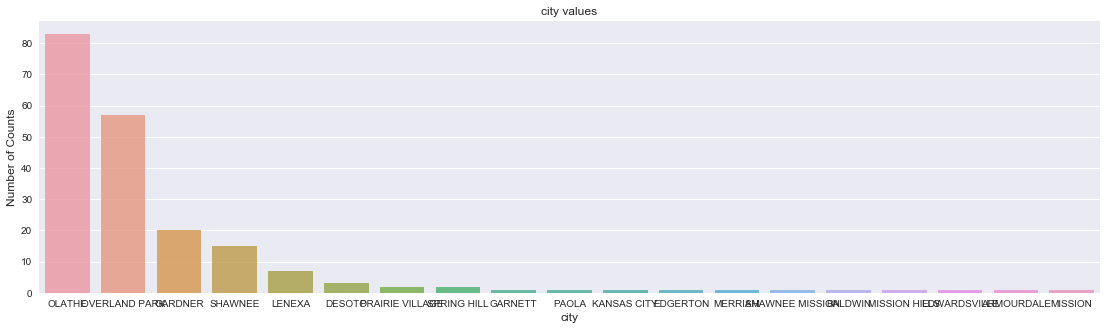

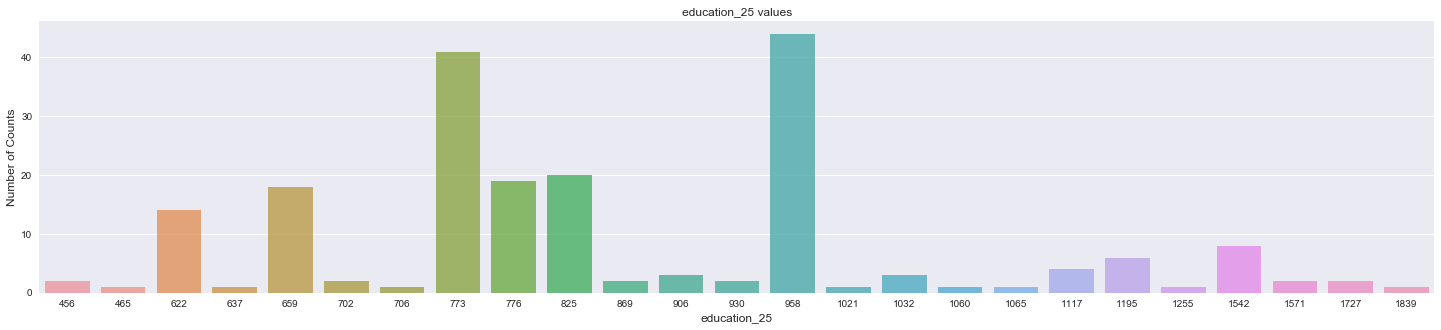

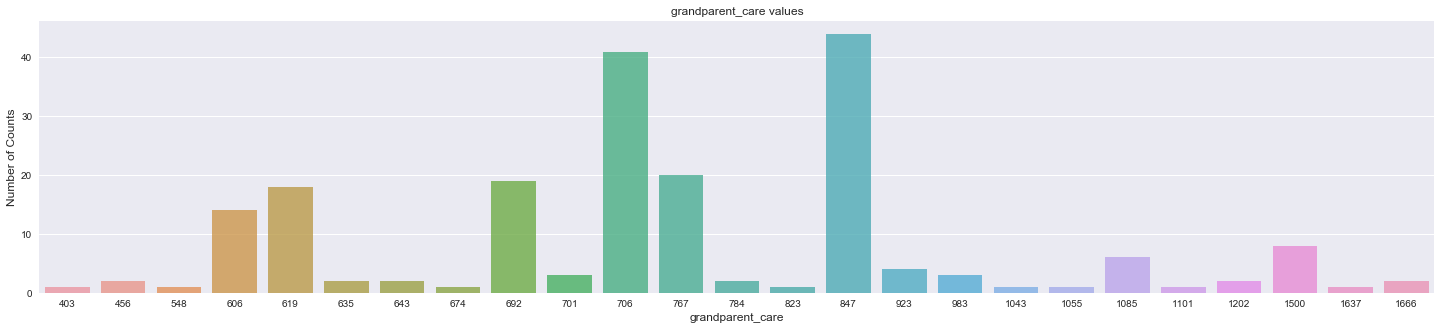

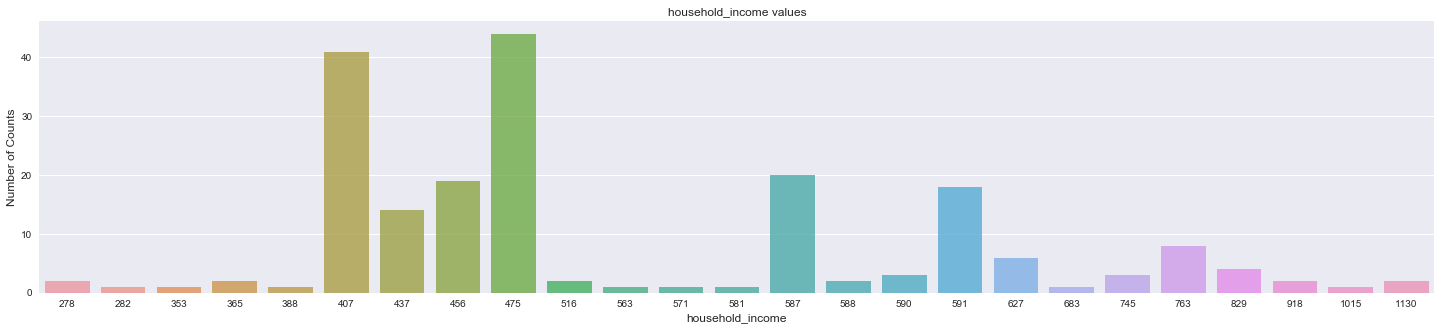

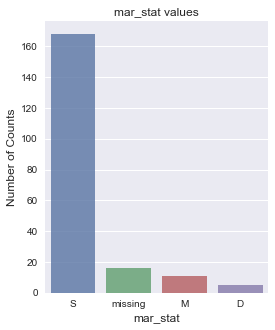

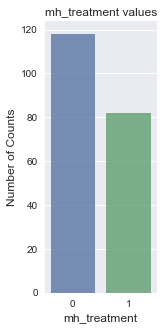

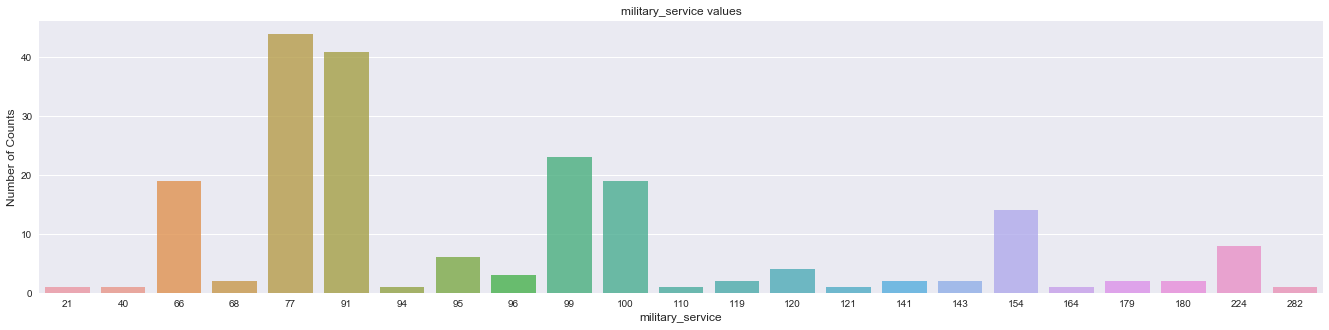

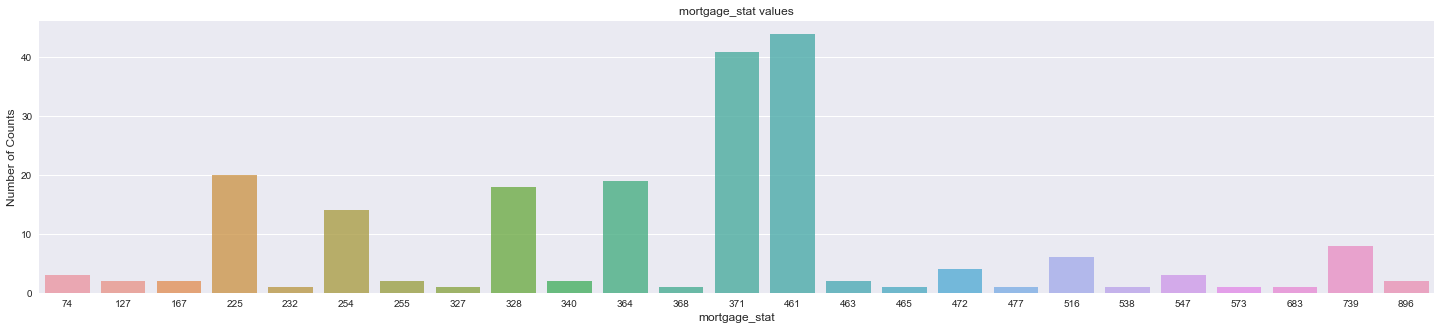

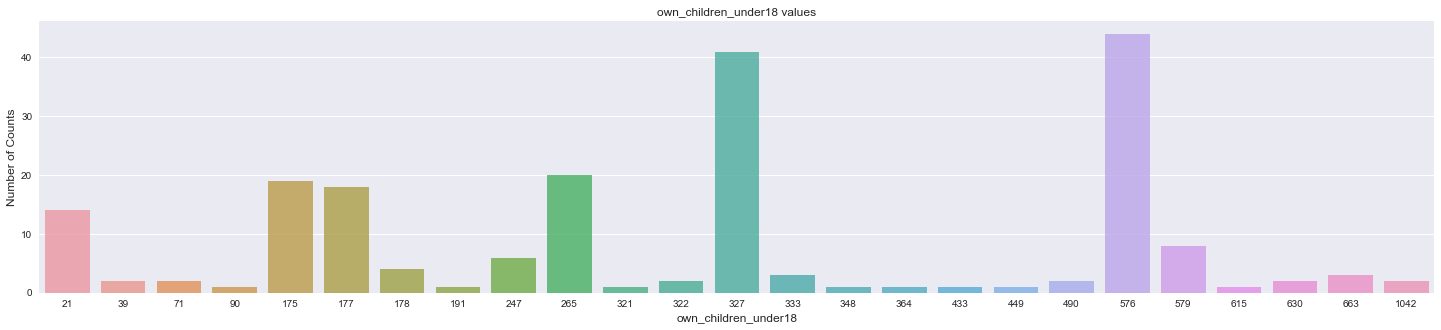

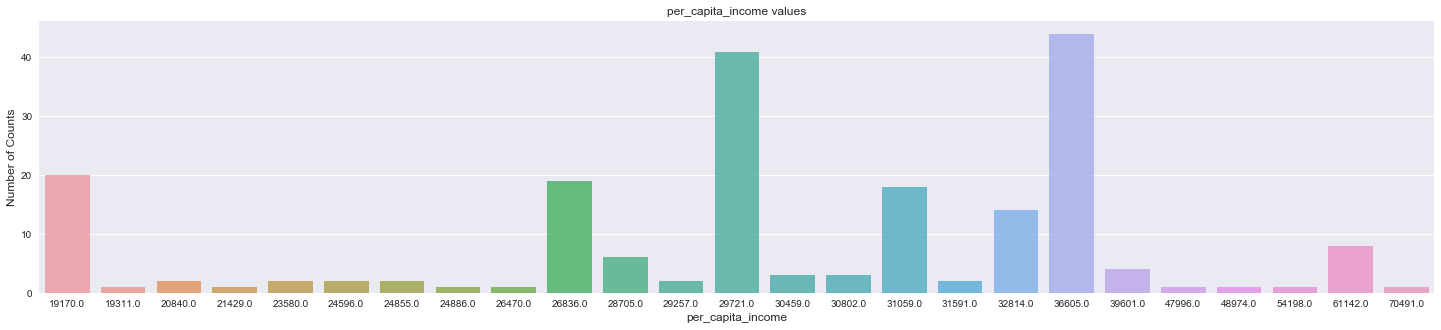

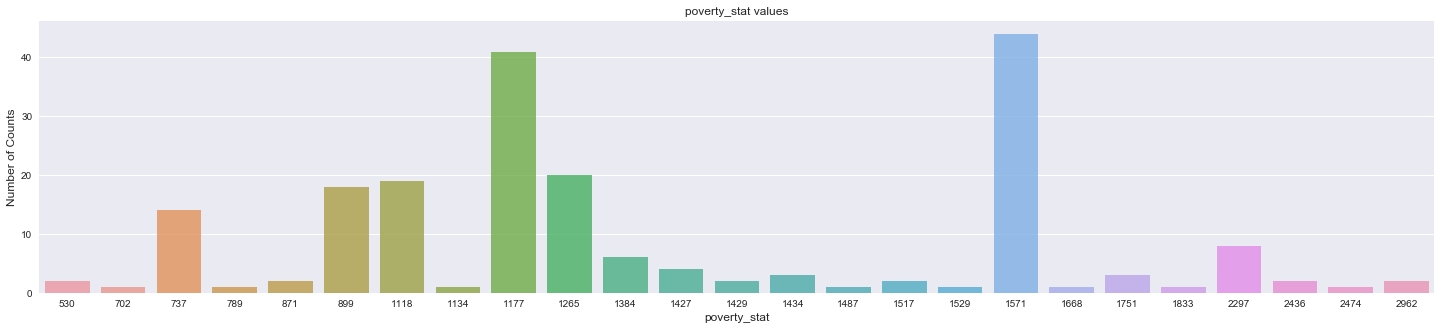

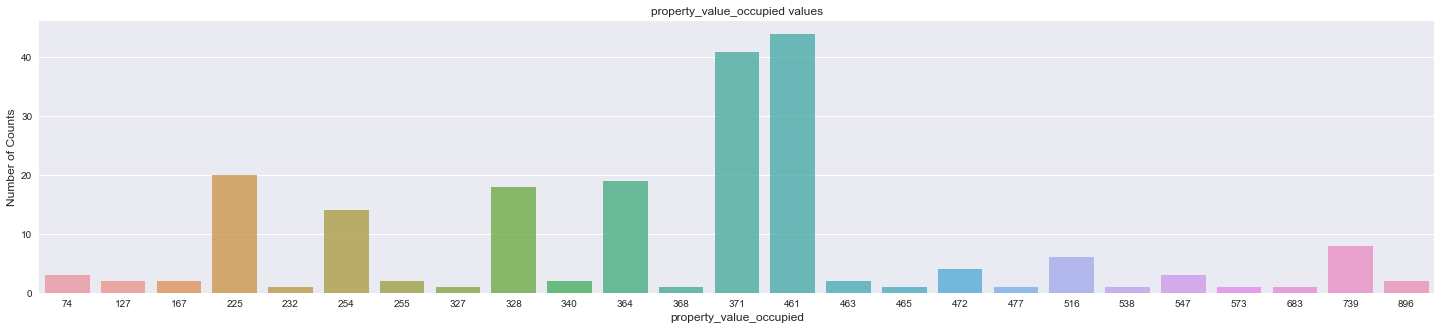

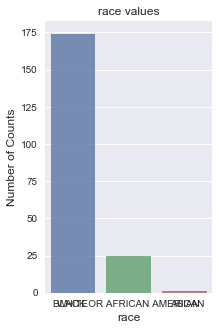

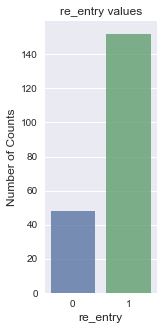

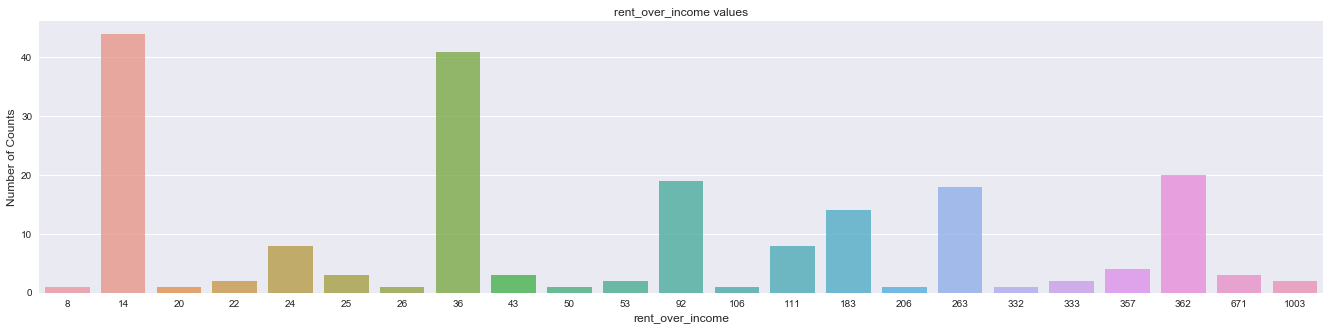

In [29]:
final_plot.plot_df(RF_df2[:200], features_to_see, save=False)

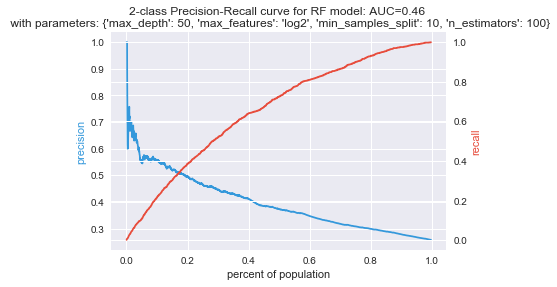

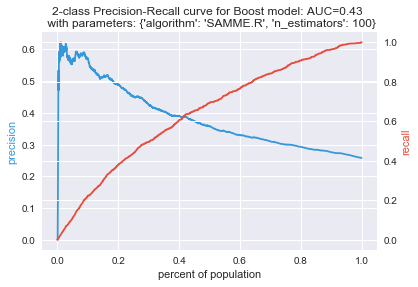

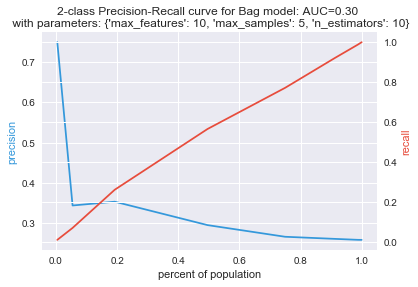

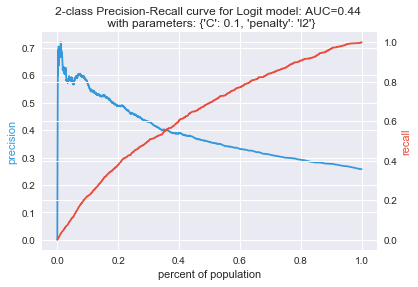

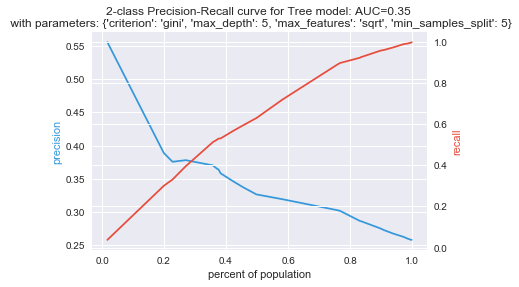

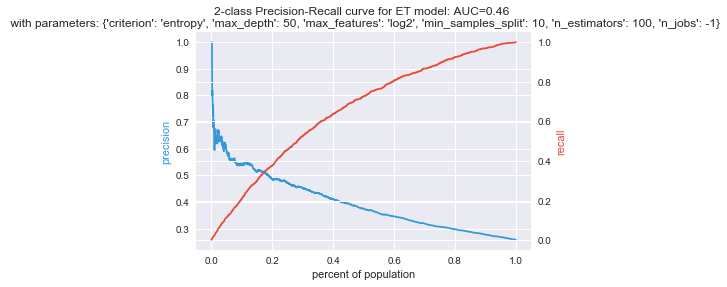

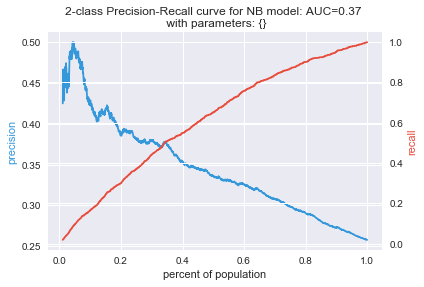

In [30]:
final_plot.plot_best(["RF", "Boost", "Bag", "Logit", "Tree",  "ET", "NB"],  x_train, x_test, y_train['within_two'], y_test['within_two'], best)

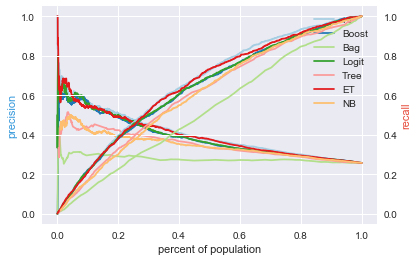

In [31]:
final_plot.plot_mult(['RF', 'Boost','Bag', 'Logit', 'Tree', 'ET', 'NB'], x_train, x_test, y_train['within_two'], y_test['within_two'], best2)

Feature ranking for within_two
1. bailed_out (0.064041)
2. bail_typeSUR (0.046936)
3. case_typeCR (0.036031)
4. bail_amt_bin1 (0.033205)
5. age_bin1 (0.032268)
6. case_typeDV (0.028926)
7. bail_typePR (0.025112)
8. bail_amt_bin3 (0.024059)
9. mar_statS (0.023206)
10. sexMALE (0.022919)
11. sexFEMALE (0.022328)
12. case_typeJV (0.022127)
13. bail_amt_bin4 (0.022092)
14. age_bin4 (0.021719)
15. bail_amt_bin2 (0.020931)
16. age_bin2 (0.020416)
17. age_bin3 (0.019839)
18. mar_statM (0.019812)
19. arresting_agencyOLATHE P.D. (0.019506)
20. raceWHITE (0.017794)


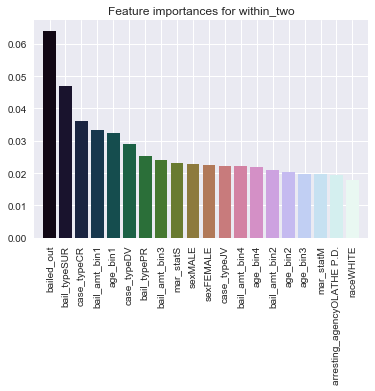

In [32]:
final_plot.feature_importance(x_train, y_train['within_two'], best2, "ET", 20)

In [33]:
################Print out the Decision Tree####################

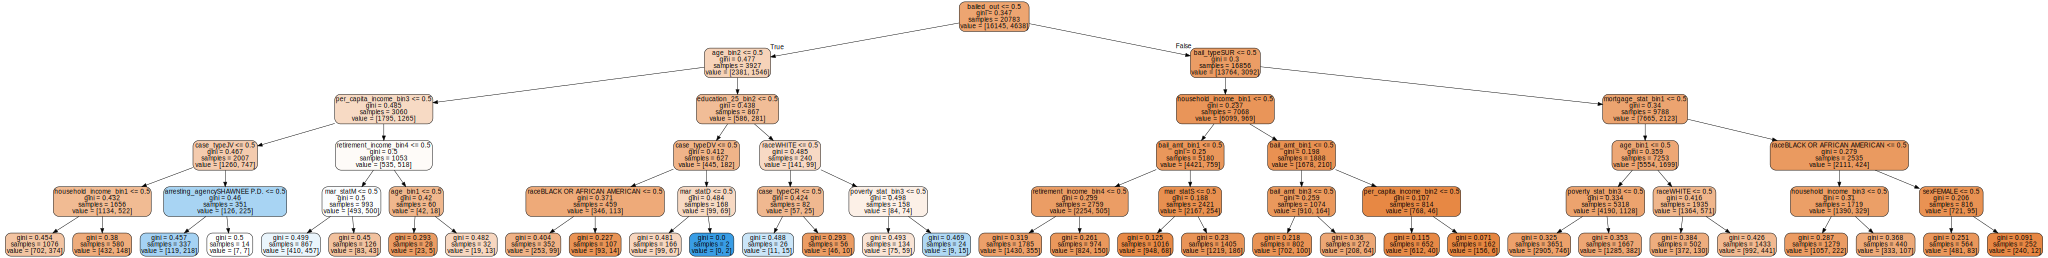

In [34]:
final_plot.print_tree(x_train, y_train["within_one"], best)